In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

X = pd.get_dummies(train_data[features])
y = train_data['Survived']
X_test = pd.get_dummies(test_data[features])
PassengerId = train_data['PassengerId']

imputer = SimpleImputer(strategy = 'mean')

X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns = X_test.columns)

model = DecisionTreeRegressor(random_state = 1)
model.fit(X, y)

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

output = pd.DataFrame({
    'PassengerId': test_data.PassengerId,
    'Survived': predictions
})

output.to_csv('final.csv', index=False)


<Axes: xlabel='PassengerId', ylabel='Age'>

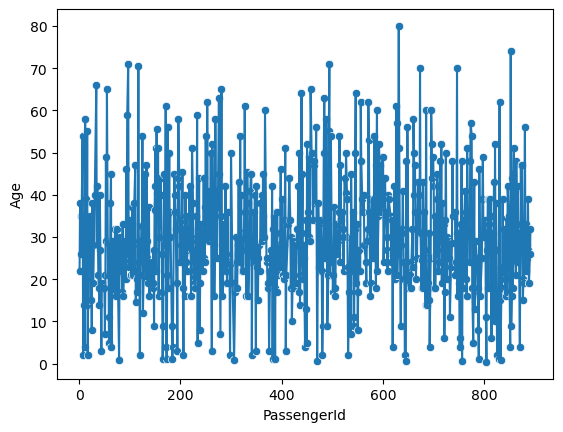

In [49]:
import pandas as pd
import seaborn as sns

train_data_path = pd.read_csv('train.csv')
test_data_path = pd.read_csv('test.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

X = train_data_path[features]
y = train_data_path.Survived

sns.scatterplot(
    data = train_data_path,
    x = 'PassengerId',
    y = 'Age'
)

sns.lineplot(
    data = train_data_path,
    x = 'PassengerId',
    y = 'Age'
)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

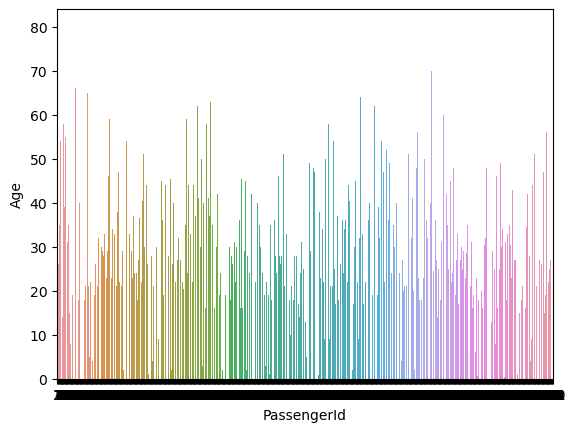

In [68]:
sns.barplot(
    data = train_data_path,
    x = 'PassengerId',
    y = 'Age'
)

train_data_path.columns

<Axes: xlabel='Age', ylabel='Count'>

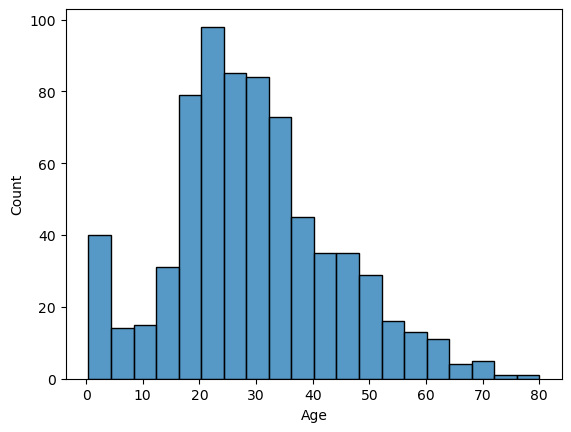

In [64]:
sns.histplot(train_data_path['Age'])

In [3]:
test_data_path

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
output

In [ ]:
train_data.head()

In [ ]:
y = train_data['Survived'].dropna()[:714]
print(y)

In [ ]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [ ]:
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features].dropna())
print(X)
print(X_test)

In [ ]:
X = X.dropna()
print(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 5,
    random_state = 1
)

model

In [ ]:
model.fit(X, y)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_test = pd.get_dummies(test_data[features].dropna())

X_test

In [ ]:
test_data

In [ ]:
X_test = X_test.dropna()
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
y

In [ ]:
predictions

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
y_train = train_data['Sex']
train_sep = train_data.drop(columns=['Sex']) # delete column Sex 
train_sep

In [ ]:
y_train

In [ ]:
train_data

In [ ]:
train_data['Age']

In [ ]:
import seaborn as sns

sns.barplot(
    x="Pclass", 
    y="Survived", 
    data=train_data
);

In [ ]:
sns.scatterplot(
    data = train_data['Pclass']
)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [ ]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [ ]:
strat_train_set

In [ ]:
strat_test_set

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy = 'mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [ ]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
print(women)

In [ ]:
rate_women = sum(women) / len(women)

print(rate_women)

In [ ]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
print(men)

In [ ]:
rate_men = sum(men) / len(men)

print(rate_men)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']

feauters = ['Pclass', 'Sex', 'SibSp', 'Parch']

X = pd.get_dummies(train_data[feauters])
X_test = pd.get_dummies(test_data[feauters])

model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 5,
    random_state = 1
)

model.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({
    'PassengerId': test_data.PassengerId,
    'Survived': predictions
})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")  